# Importing The Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.7.0'

# Loading The Dataset

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test ,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [5]:
X_train.shape

(60000, 28, 28)

# Visualizing The Images

In [6]:
np.random.randint(0,59999)

42597

1


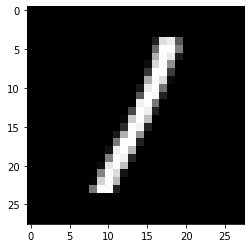

In [8]:
i = np.random.randint(0,59999)
print(y_train[i])
plt.imshow(X_train[i], cmap = "gray")
plt.show()

In [9]:
np.arange(0,100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

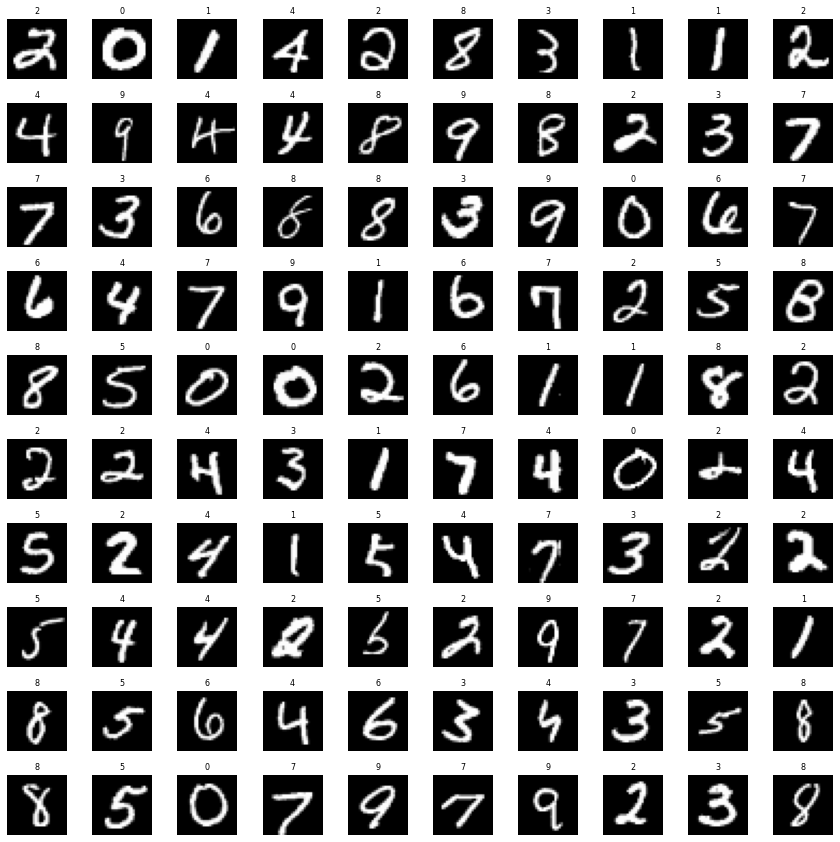

In [14]:
width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize = (15,15))
#print(axes.shape)
axes = axes.ravel() # (10,10) --> 100
#print(axes.shape)
for i in np.arange(0, width* height):
    index = np.random.randint(0,59999)
    axes[i].imshow(X_train[index], cmap = "gray")
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis("off")

plt.subplots_adjust(hspace = .4)

# Pre-Processing The Images

In [15]:
X_train.max(),X_train.min()

(255, 0)

In [16]:
X_train = X_train / 255
X_test = X_test / 255

X_train.max(),X_train.min(),X_test.max(),X_test.min()

(1.0, 0.0, 1.0, 0.0)

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

# Building And Training The Linear AutoEncoder

In [19]:
# 784 - 128 - 64 - 32 - 64 - 128 - 784

In [31]:
autoencoder = Sequential()

# Encode
autoencoder.add(Dense(units = 128, activation = "relu", input_dim = 784))
autoencoder.add(Dense(units = 64, activation = "relu"))
autoencoder.add(Dense(units = 32, activation = "relu"))

# Decode
autoencoder.add(Dense(units = 64, activation = "relu"))
autoencoder.add(Dense(units = 128, activation = "relu"))
autoencoder.add(Dense(units = 784, activation = "sigmoid"))

autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 64)                2112      
                                                                 
 dense_28 (Dense)            (None, 128)               8320      
                                                                 
 dense_29 (Dense)            (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

In [32]:
autoencoder.compile(optimizer = "Adam",loss = "binary_crossentropy", metrics = ["accuracy"])
history = autoencoder.fit(X_train, X_train, epochs = 50, validation_data = (X_test,X_test))

Epoch 1/50
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1521 - accuracy: 0.0096 - val_loss: 0.1157 - val_accuracy: 0.0095
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1109 - accuracy: 0.0102 - val_loss: 0.1038 - val_accuracy: 0.0102
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1021 - accuracy: 0.0111 - val_loss: 0.0984 - val_accuracy: 0.0123
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0975 - accuracy: 0.0119 - val_loss: 0.0950 - val_accuracy: 0.0108
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0945 - accuracy: 0.0115 - val_loss: 0.0920 - val_accuracy: 0.0121
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0921 - accuracy: 0.0120 - val_loss: 0.0900 - val_accuracy: 0.0120
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0903 - accuracy: 0.0127 - val_loss: 0.0883 - val_ac

In [53]:
def history_graph(history, epochs):

    plt.figure(figsize = (10,6))

    plt.subplot(121)
    plt.plot(history.history["accuracy"],label = "Train")
    plt.plot(history.history["val_accuracy"],label = "Validation")
    plt.legend(loc = "best")
    plt.title("Accuracy Score")
    plt.xticks(range(1,epochs+1,3), rotation = 90)

    plt.subplot(122)
    plt.plot(history.history["loss"],label = "Train")
    plt.plot(history.history["val_loss"],label = "Validation")
    plt.legend(loc = "best")
    plt.title("Loss Score")
    plt.xticks(range(1,epochs+1,3), rotation = 90)

    plt.tight_layout()
    plt.show()

def confusion_graph(y_test,y_pred):

    cm = confusion_matrix(y_test,y_pred)

    plt.figure(figsize = (10,5))
    sns.heatmap(cm, annot = True, fmt = "d", cbar = False, linewidth = 0.4, linecolor="white", annot_kws = {"size" : 20})
    plt.ylabel("Actual",fontsize = 15)
    plt.xlabel("Predicted",fontsize = 15)
    plt.title("Confusion Matrix Graph", fontsize = 15)
    plt.show()

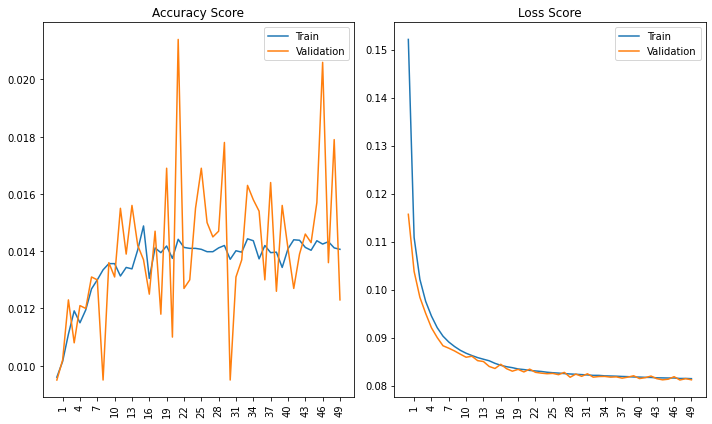

In [34]:
history_graph(history, epochs = 50)

# Encoding The Images

In [35]:
autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 64)                2112      
                                                                 
 dense_28 (Dense)            (None, 128)               8320      
                                                                 
 dense_29 (Dense)            (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

In [36]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_24_input')>

In [43]:
autoencoder.get_layer("dense_26").output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_26')>

In [44]:
from tensorflow.keras.models import Model

In [45]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer("dense_26").output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24_input (InputLayer)  [(None, 784)]            0         
                                                                 
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [46]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

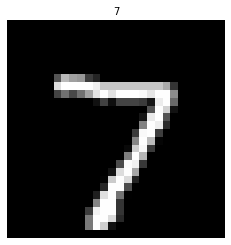

In [47]:
i = np.random.randint(0,59999)
i = 0
plt.imshow(X_test[i].reshape(28,28), cmap = "gray")
plt.title(y_test[i], fontsize = 10)
plt.axis("off")
plt.show()

In [51]:
X_test[i].shape,X_test[i].reshape(1,-1).shape

((784,), (1, 784))

In [54]:
encoded_image = encoder.predict(X_test[i].reshape(1,-1))
encoded_image.shape,encoded_image

((1, 32),
 array([[1.6632862, 3.8124182, 0.       , 0.       , 4.959803 , 3.5938325,
         6.593205 , 1.759078 , 5.1941934, 0.       , 0.       , 1.7928786,
         2.7271817, 0.5555667, 8.051751 , 0.       , 2.386402 , 5.401253 ,
         6.8404636, 8.040935 , 0.       , 3.8784485, 3.9241714, 4.9171643,
         2.8866153, 2.9759717, 3.5969172, 1.6433595, 5.6928716, 6.81257  ,
         2.4465663, 3.9807806]], dtype=float32))

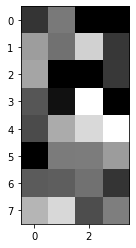

In [55]:
plt.imshow(encoded_image.reshape(8,4), cmap = "gray")
plt.show()

# Decoding The Images

In [57]:
autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 64)                2112      
                                                                 
 dense_28 (Dense)            (None, 128)               8320      
                                                                 
 dense_29 (Dense)            (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

In [59]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24_input (InputLayer)  [(None, 784)]            0         
                                                                 
 dense_24 (Dense)            (None, 128)               100480    
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [58]:
input_layer_decoder = Input(shape = (32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs =input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_27 (Dense)            (None, 64)                2112      
                                                                 
 dense_28 (Dense)            (None, 128)               8320      
                                                                 
 dense_29 (Dense)            (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [60]:
decoded_image = decoder.predict(encoded_image)
decoded_image.shape

(1, 784)

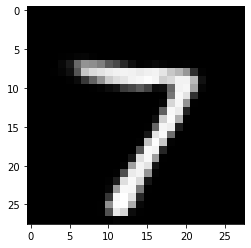

In [61]:
plt.imshow(decoded_image.reshape(28,28), cmap ="gray")
plt.show()

# Encoding and Decoding The Test Images

In [65]:
X_test.shape[0]

10000

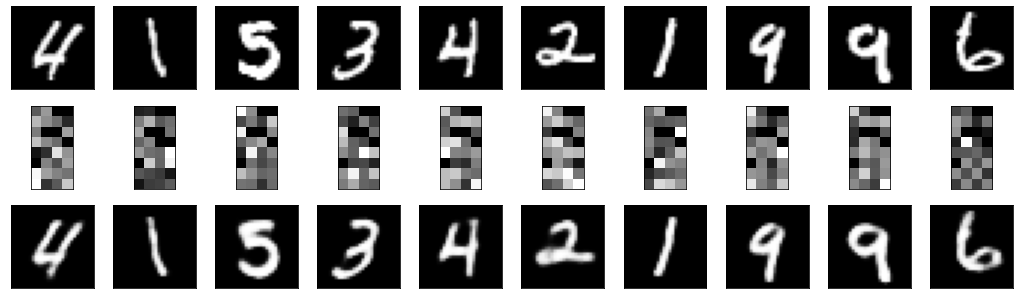

In [70]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0]-1 , size = n_images) # 10 tane değer döner !!!
#print(test_images)
plt.figure(figsize = (18,18))
for i,image_index in enumerate(test_images):

    # Original Image

    ax = plt.subplot(10,10,i+1) # 0 kabul etmiyor !!! ondan +1
    plt.imshow(X_test[image_index].reshape(28,28), cmap = "gray")
    plt.xticks(())
    plt.yticks(())

    # Encoded Image

    ax = plt.subplot(10,10,n_images + i+1) # 0 kabul etmiyor !!! ondan +1
    encoded_image = encoder.predict(X_test[image_index].reshape(1,-1))
    plt.imshow(encoded_image.reshape(8,4), cmap = "gray")
    plt.xticks(())
    plt.yticks(())

    # Decoded Image

    ax = plt.subplot(10,10,2*n_images + i+1) # 0 kabul etmiyor !!! ondan +1
    decoded_image = decoder.predict(encoded_image)
    plt.imshow(decoded_image.reshape(28,28), cmap = "gray")
    plt.xticks(())
    plt.yticks(())

# Convolutional AutoEncoders

# Importing The Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, UpSampling2D, Reshape , Flatten, Input

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(X_train,y_train), (X_test ,y_test ) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


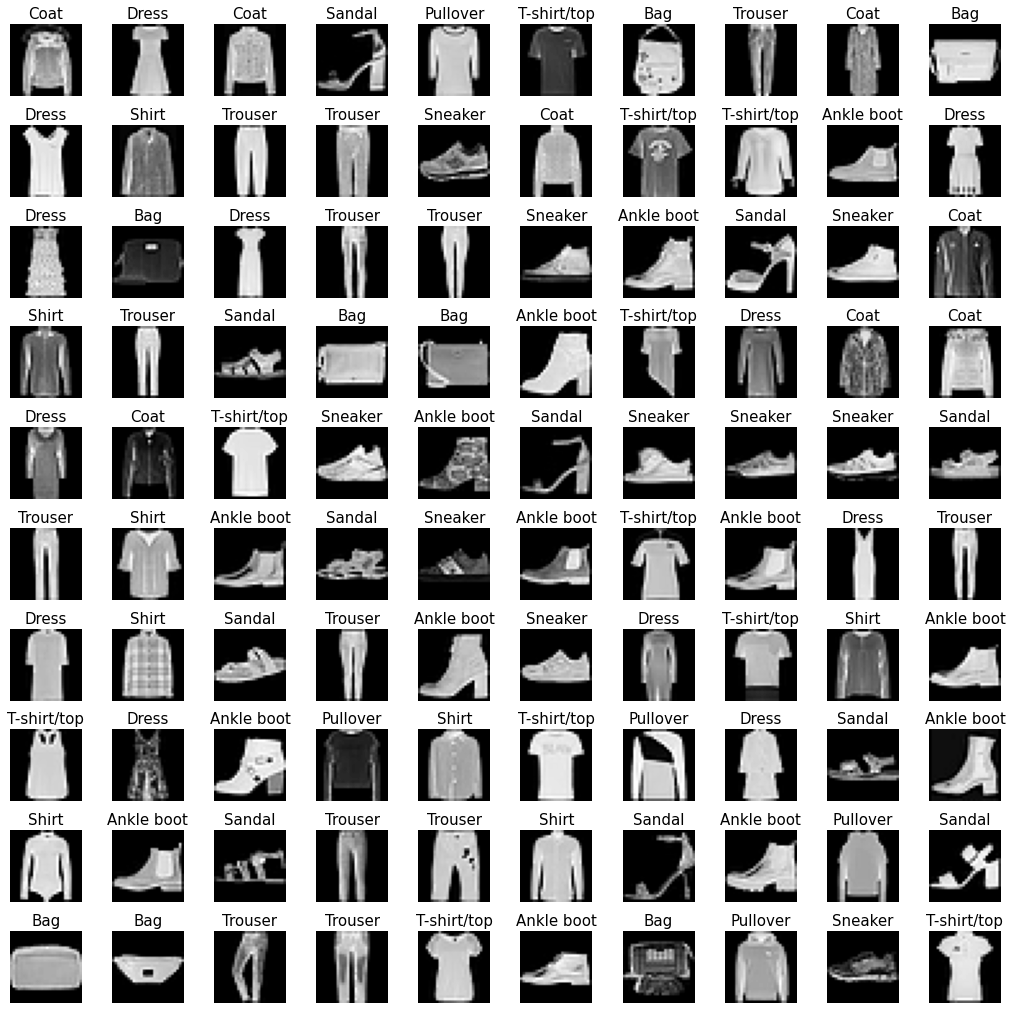

In [5]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

width , height = 10,10

fig, axes = plt.subplots(height, width, figsize = (18,18))
axes = axes.ravel()
for i in np.arange(0, width*height):
    index = np.random.randint(0,60000)
    axes[i].imshow(X_train[index], cmap = "gray")
    axes[i].set_title(classes[y_train[index]], fontsize = 15)
    axes[i].axis("off")

plt.subplots_adjust(hspace = 0.4)

# PreProcessing The Images

In [6]:
X_train = X_train / 255
X_test = X_test / 255

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
X_train = X_train.reshape((len(X_train), 28, 28, 1))
X_test = X_test.reshape((len(X_test), 28, 28, 1))

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

# Building And Training The Convolutional AutoEncoder

In [8]:
autoencoder = Sequential()

######### Encoder

autoencoder.add(Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", padding = "valid", input_shape = (28,28,1)))
autoencoder.add(MaxPooling2D(pool_size= (2,2)))

# Önemli Bir Etki padding = "same"
autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation = "relu", padding = "same"))
autoencoder.add(MaxPooling2D(pool_size= (2,2),padding = "same"))

#autoencoder.summary()

autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation = "relu", padding = "same", strides = (2,2)))
autoencoder.add(Flatten())

#autoencoder.summary()

######### Decoder

autoencoder.add(Reshape((4,4,8)))

autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation = "relu", padding = "same"))
autoencoder.add(UpSampling2D(size = (2,2)))

#autoencoder.summary()

autoencoder.add(Conv2D(filters = 8, kernel_size = (3,3), activation = "relu", padding = "same"))
autoencoder.add(UpSampling2D(size = (2,2)))

autoencoder.add(Conv2D(filters = 16, kernel_size = (3,3), activation = "relu"))
autoencoder.add(UpSampling2D(size = (2,2)))

autoencoder.add(Conv2D(filters = 1, kernel_size = (3,3), activation = "sigmoid",padding = "same"))

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)               0

In [9]:
# Output = (Input - Filter + 1) / Stride

# Input: (28, 28, 1)
# Filter size: 3
# Output: (28 - 3 + 1) / 1 = 26 -> (26, 26, 16)

# UpSampling2D: (16, 16, 8)
# Filter size: 3
# Output: (16 - 3 + 1) / 1 = 14 -> (14, 14, 16)

In [10]:
(28 - 3 + 1) / 1, (16 - 3 + 1) / 1

(26.0, 14.0)

In [11]:
autoencoder.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])
history = autoencoder.fit(X_train , X_train, epochs = 50, validation_data = (X_test,X_test))

Epoch 1/50
1875/1875 [==============================] - 26s 8ms/step - loss: 0.3164 - accuracy: 0.5036 - val_loss: 0.2980 - val_accuracy: 0.5044
Epoch 2/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2902 - accuracy: 0.5062 - val_loss: 0.2900 - val_accuracy: 0.5050
Epoch 3/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2853 - accuracy: 0.5068 - val_loss: 0.2856 - val_accuracy: 0.5046
Epoch 4/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2824 - accuracy: 0.5071 - val_loss: 0.2838 - val_accuracy: 0.5054
Epoch 5/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2804 - accuracy: 0.5074 - val_loss: 0.2818 - val_accuracy: 0.5053
Epoch 6/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2789 - accuracy: 0.5076 - val_loss: 0.2803 - val_accuracy: 0.5057
Epoch 7/50
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2778 - accuracy: 0.5078 - val_loss: 0.2792 - val

# Encoding and decoding the test images

In [12]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)               0

In [16]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer("flatten").output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584   

In [17]:
encoded_pred = encoder.predict(X_test)
encoded_pred.shape

(10000, 128)

In [18]:
encoded_pred[0].shape

(128,)

In [19]:
decoded_pred = autoencoder.predict(X_test)
decoded_pred.shape

(10000, 28, 28, 1)

In [20]:
decoded_pred[0].shape

(28, 28, 1)

In [21]:
X_test.shape

(10000, 28, 28, 1)

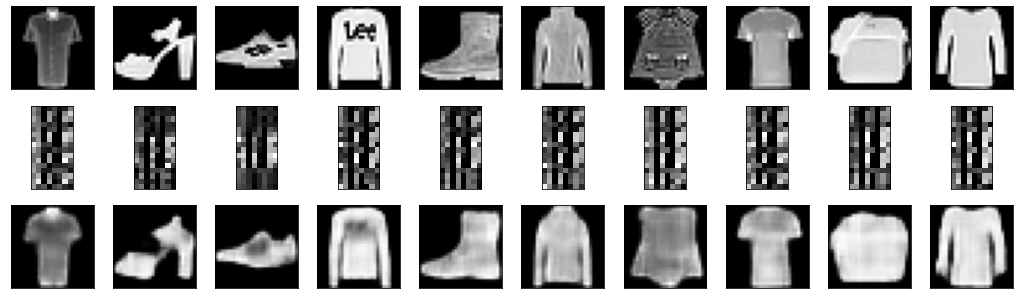

In [23]:
n_images = 10
test_images = np.random.randint(0,X_test.shape[0], size = n_images)
plt.figure(figsize = (18,18))
for i , image_index in enumerate(test_images):
    
    # Original Images
    ax = plt.subplot(10,10,i + 1)
    plt.imshow(X_test[image_index].reshape(28,28), cmap = "gray")
    plt.xticks(())
    plt.yticks(())

    # Encoded Images
    ax = plt.subplot(10,10,n_images+i + 1)
    plt.imshow(encoded_pred[image_index].reshape(16,8), cmap = "gray")
    plt.xticks(())
    plt.yticks(())

    # Decoded Images
    ax = plt.subplot(10,10,2*n_images + i + 1)
    plt.imshow(decoded_pred[image_index].reshape(28,28), cmap = "gray")
    plt.xticks(())
    plt.yticks(())

In [33]:
X_test[0].shape,X_test[0].reshape((1,28,28,1)).shape

((28, 28, 1), (1, 784))

In [36]:
encoder.predict(X_test[0].reshape((1,28,28,1))).shape

(1, 128)

In [41]:
autoencoder.predict(X_test[0].reshape((1,28,28,1))).shape

(1, 28, 28, 1)

---

# HomeWork

In [42]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab.patches import cv2_imshow

from tensorflow.keras.datasets import cifar10

In [43]:
(X_train,y_train) , (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [44]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

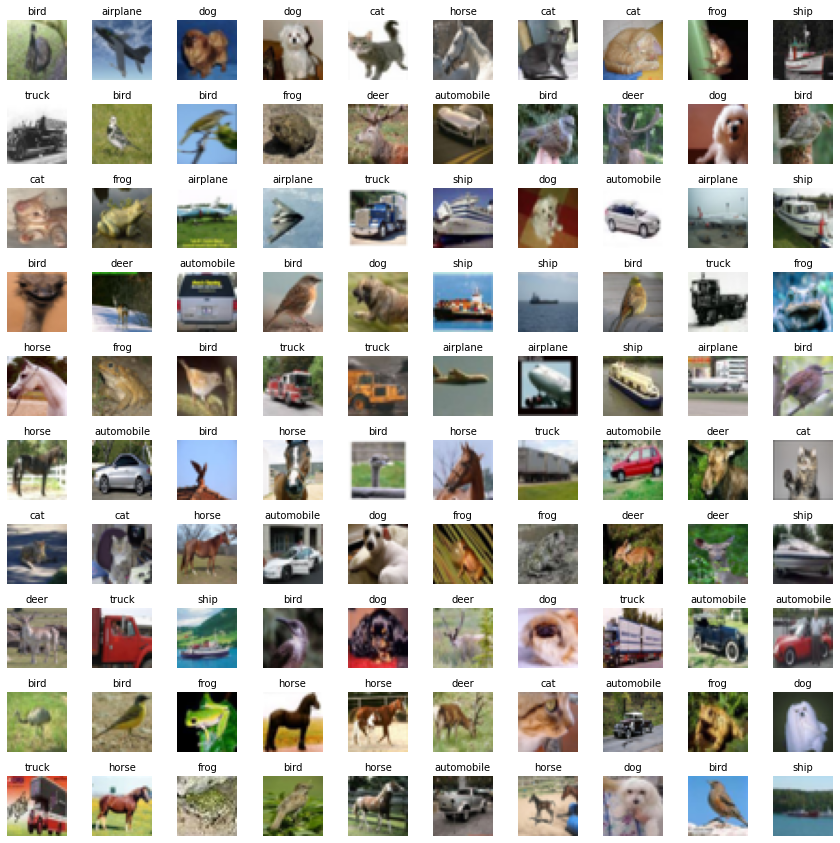

In [45]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

width = 10
height = 10

fig , axes = plt.subplots(height , width, figsize = (15,15))
axes = axes.ravel()

for i in np.arange(0 , width * height):

    index = np.random.randint(0,50000)
    axes[i].imshow(X_train[index], cmap = "gray")
    axes[i].set_title(classes[y_train[index][0]], fontsize = 10)
    axes[i].axis("off")

plt.subplots_adjust(hspace = 0.4)

In [46]:
X_train = X_train / 255
X_test = X_test / 255

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [47]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D,Flatten,AveragePooling2D,BatchNormalization,UpSampling2D,Reshape,Input

In [48]:
autoencoder = Sequential()

# Encoder 

autoencoder.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", padding = "same", input_shape = (32,32,3)))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D(pool_size = (2,2), padding = "same"))

autoencoder.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", padding = "same"))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D(pool_size = (2,2), padding = "same"))

autoencoder.add(Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", padding = "same"))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D(pool_size = (2,2), padding = "same")) # Encoded Images

# Decoder

autoencoder.add(Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", padding = "same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D(size = (2,2)))

autoencoder.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", padding = "same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D(size = (2,2)))

autoencoder.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", padding = "same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D(size = (2,2)))

# 3 Channels Var Gray olarak almadık !!!

autoencoder.add(Conv2D(filters = 3, kernel_size = (3,3), activation = "sigmoid", padding = "same"))

autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                      

In [49]:
# Output = (Input - Filter + 1) / Stride

In [50]:
autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [51]:
history = autoencoder.fit(X_train, X_train, epochs = 50, validation_data = (X_test, X_test))

Epoch 1/50
1563/1563 [==============================] - 40s 24ms/step - loss: 0.5824 - accuracy: 0.6482 - val_loss: 0.5734 - val_accuracy: 0.6477
Epoch 2/50
1563/1563 [==============================] - 34s 22ms/step - loss: 0.5684 - accuracy: 0.7207 - val_loss: 0.5668 - val_accuracy: 0.7471
Epoch 3/50
1563/1563 [==============================] - 37s 23ms/step - loss: 0.5647 - accuracy: 0.7406 - val_loss: 0.5671 - val_accuracy: 0.7183
Epoch 4/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.5632 - accuracy: 0.7493 - val_loss: 0.5625 - val_accuracy: 0.7823
Epoch 5/50
1563/1563 [==============================] - 38s 25ms/step - loss: 0.5624 - accuracy: 0.7537 - val_loss: 0.5659 - val_accuracy: 0.7681
Epoch 6/50
1563/1563 [==============================] - 38s 24ms/step - loss: 0.5618 - accuracy: 0.7573 - val_loss: 0.5627 - val_accuracy: 0.7116
Epoch 7/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.5613 - accuracy: 0.7584 - val_loss: 0.5607 -

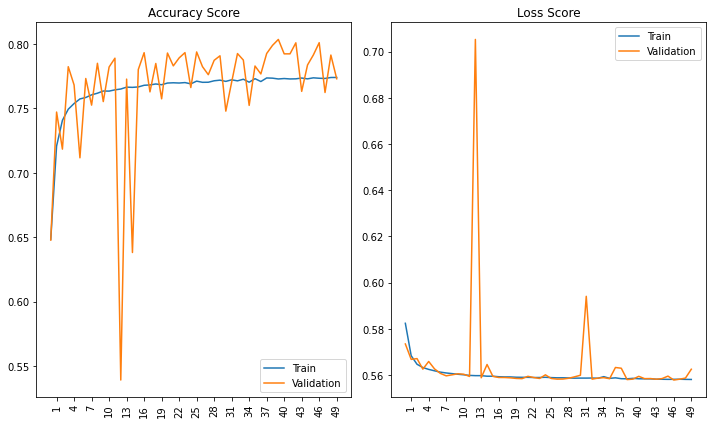

In [54]:
history_graph(history, 50)

In [56]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                      

In [57]:
encoder = Model(inputs = autoencoder.input , outputs = autoencoder.get_layer("average_pooling2d_2").output)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128 

In [58]:
encoded_pred = encoder.predict(X_test)
encoded_pred.shape

(10000, 4, 4, 16)

In [59]:
decoded_pred = autoencoder.predict(X_test)
decoded_pred.shape

(10000, 32, 32, 3)

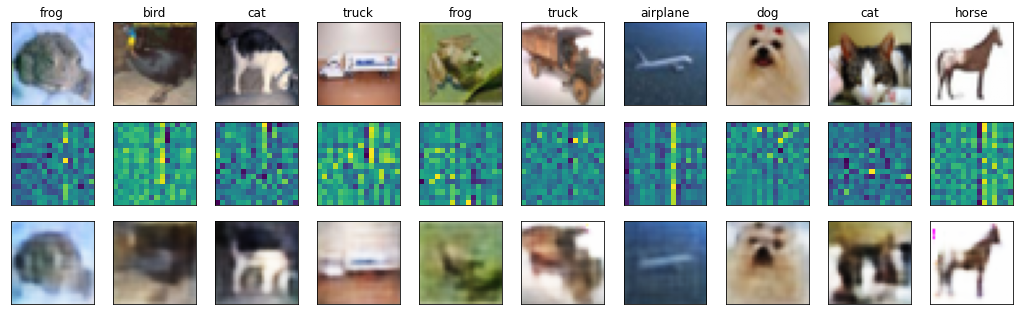

In [60]:
n_images = 10
test_images = np.random.randint(0,X_test.shape[0], size = n_images)
plt.figure(figsize = (18,18))

for i , image_index in enumerate(test_images):

    # Original Images

    ax = plt.subplot(10,10, i + 1)
    plt.imshow(X_test[image_index].reshape(32,32,3))
    plt.title(classes[y_test[image_index][0]])
    plt.xticks(())
    plt.yticks(())

    # Encoder Images

    ax = plt.subplot(10,10, i + 1 + n_images)
    plt.imshow(encoded_pred[image_index].reshape(16,16))
    plt.xticks(())
    plt.yticks(())

    # Decoder Images

    ax = plt.subplot(10,10, i + 1 + n_images*2)
    plt.imshow(decoded_pred[image_index].reshape(32,32,3))
    plt.xticks(())
    plt.yticks(())